# IBOV Analysis

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf

In [2]:
ticket = yf.Ticker("^BVSP")
df = ticket.history(interval='1d', start='2019-01-01', end='2022-01-01')

In [3]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,87887.0,91479.0,87536.0,91012.0,5615400,0,0
2019-01-03,91011.0,91596.0,89922.0,91564.0,6066200,0,0
2019-01-04,91577.0,92701.0,90824.0,91841.0,5322100,0,0
2019-01-07,91845.0,92552.0,91288.0,91699.0,4565000,0,0
2019-01-08,91699.0,92231.0,91064.0,92032.0,4496500,0,0


## Cleaning Data

In [4]:
# Removing two colomuns that will not be used.
df = df.drop(labels=["Dividends","Stock Splits"], axis = 1)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,87887.0,91479.0,87536.0,91012.0,5615400
2019-01-03,91011.0,91596.0,89922.0,91564.0,6066200
2019-01-04,91577.0,92701.0,90824.0,91841.0,5322100
2019-01-07,91845.0,92552.0,91288.0,91699.0,4565000
2019-01-08,91699.0,92231.0,91064.0,92032.0,4496500


## Parameters (Trend, Seasonal, Resid)

In [5]:
df[['Close']]

,Close
Date,
2019-01-02,91012.0
2019-01-03,91564.0
2019-01-04,91841.0
2019-01-07,91699.0
2019-01-08,92032.0
...,...
2021-12-23,104891.0
2021-12-27,105531.0
2021-12-28,104864.0


In [6]:
deco = seasonal_decompose(df[['Close']], model='additive', period=30, extrapolate_trend=30)

<AxesSubplot:xlabel='Date'>

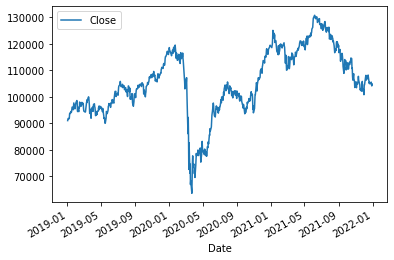

In [7]:
df[['Close']].plot()

In [8]:
deco.seasonal + deco.resid + deco.trend

Date
2019-01-02     91012.0
2019-01-03     91564.0
2019-01-04     91841.0
2019-01-07     91699.0
2019-01-08     92032.0
                ...   
2021-12-23    104891.0
2021-12-27    105531.0
2021-12-28    104864.0
2021-12-29    104107.0
2021-12-30    104822.0
Length: 743, dtype: float64

In [9]:
deco.trend.iloc[0:5]

Date
2019-01-02    95114.700067
2019-01-03    95157.486767
2019-01-04    95200.273468
2019-01-07    95243.060168
2019-01-08    95285.846868
Name: trend, dtype: float64

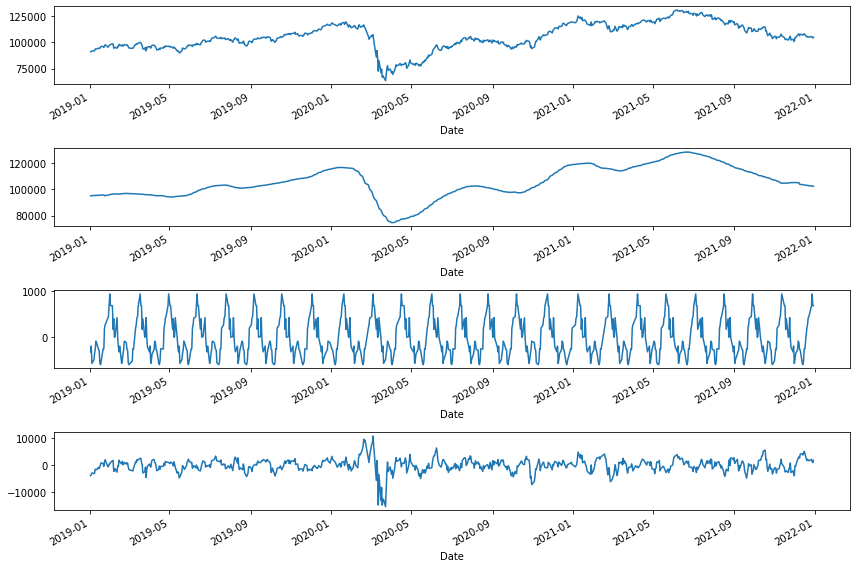

In [10]:
# Plotting the deco variable to visualize the parameters(Trend, Seasonal, Resid).
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,8))

deco.observed.plot(ax=ax1)
deco.trend.plot(ax=ax2)
deco.seasonal.plot(ax=ax3)
deco.resid.plot(ax=ax4)

plt.tight_layout()

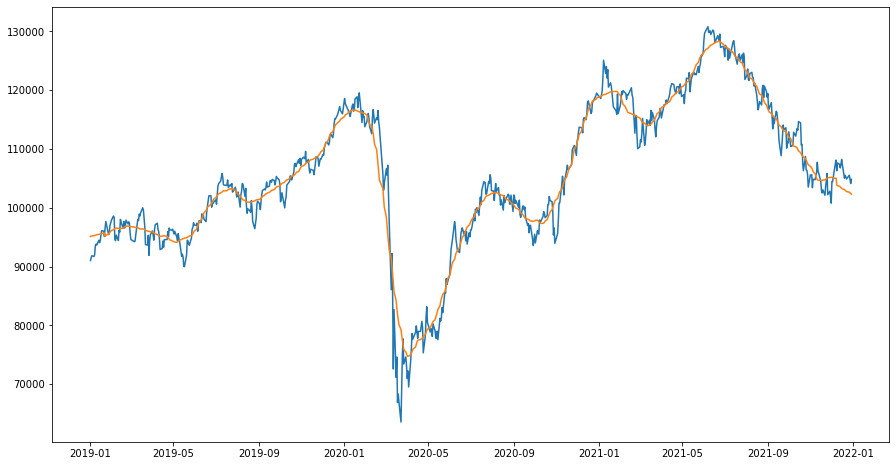

In [11]:
ax, fig = plt.subplots(figsize=(15, 8))
plt.plot(deco.observed)
plt.plot(deco.trend)

## Moving Average

In [12]:
df['Close']

Date
2019-01-02     91012.0
2019-01-03     91564.0
2019-01-04     91841.0
2019-01-07     91699.0
2019-01-08     92032.0
                ...   
2021-12-23    104891.0
2021-12-27    105531.0
2021-12-28    104864.0
2021-12-29    104107.0
2021-12-30    104822.0
Name: Close, Length: 743, dtype: float64

In [13]:
df['Close'].rolling(7).mean()

Date
2019-01-02              NaN
2019-01-03              NaN
2019-01-04              NaN
2019-01-07              NaN
2019-01-08              NaN
                  ...      
2021-12-23    106231.428571
2021-12-27    105960.000000
2021-12-28    105481.714286
2021-12-29    105022.428571
2021-12-30    104994.142857
Name: Close, Length: 743, dtype: float64

In [14]:
mov_avg7d = df['Close'].rolling(7).mean()
mov_avg14d = df['Close'].rolling(14).mean()
mov_avg21d = df['Close'].rolling(21).mean()

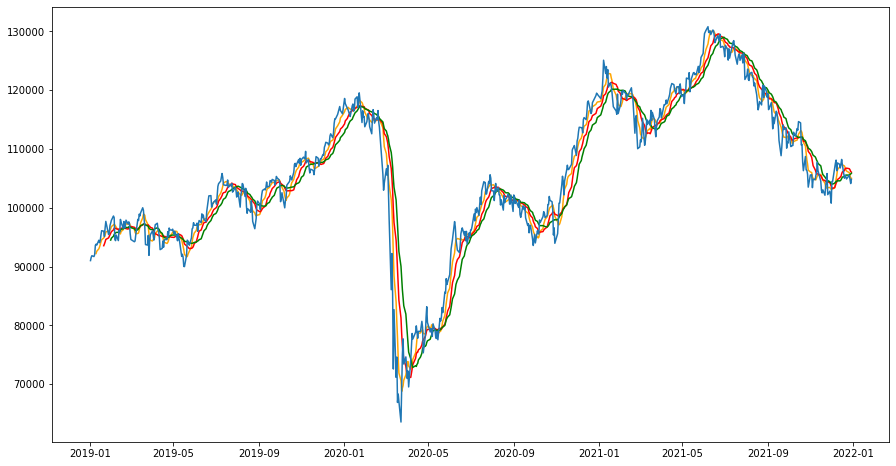

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(mov_avg7d, 'orange')
plt.plot(mov_avg14d, 'red')
plt.plot(mov_avg21d, 'green')
plt.plot(df['Close'])

## Features

In [16]:
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-01-02,87887.0,91479.0,87536.0,91012.0,5615400
1,2019-01-03,91011.0,91596.0,89922.0,91564.0,6066200
2,2019-01-04,91577.0,92701.0,90824.0,91841.0,5322100
3,2019-01-07,91845.0,92552.0,91288.0,91699.0,4565000
4,2019-01-08,91699.0,92231.0,91064.0,92032.0,4496500


In [17]:
# Creating features for each time period, such as (Year, Month, Day).
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day
0,2019-01-02,87887.0,91479.0,87536.0,91012.0,5615400,2019,1,2
1,2019-01-03,91011.0,91596.0,89922.0,91564.0,6066200,2019,1,3
2,2019-01-04,91577.0,92701.0,90824.0,91841.0,5322100,2019,1,4
3,2019-01-07,91845.0,92552.0,91288.0,91699.0,4565000,2019,1,7
4,2019-01-08,91699.0,92231.0,91064.0,92032.0,4496500,2019,1,8


In [18]:
df['Close'].shift()

0           NaN
1       91012.0
2       91564.0
3       91841.0
4       91699.0
         ...   
738    105244.0
739    104891.0
740    105531.0
741    104864.0
742    104107.0
Name: Close, Length: 743, dtype: float64

In [19]:
# Creating feature for ibov yield.
df['Yield'] = df['Close'] / df['Close'].shift() * 100 - 100

In [20]:
df

,Date,Open,High,Low,Close,Volume,Year,Month,Day,Yield
0,2019-01-02,87887.0,91479.0,87536.0,91012.0,5615400,2019,1,2,NaN
1,2019-01-03,91011.0,91596.0,89922.0,91564.0,6066200,2019,1,3,0.606513
2,2019-01-04,91577.0,92701.0,90824.0,91841.0,5322100,2019,1,4,0.302521
3,2019-01-07,91845.0,92552.0,91288.0,91699.0,4565000,2019,1,7,-0.154615
4,2019-01-08,91699.0,92231.0,91064.0,92032.0,4496500,2019,1,8,0.363145
...,...,...,...,...,...,...,...,...,...,...
738,2021-12-23,105251.0,105453.0,104637.0,104891.0,7283600,2021,12,23,-0.335411
739,2021-12-27,104892.0,105694.0,104798.0,105531.0,7594900,2021,12,27,0.610157
740,2021-12-28,105555.0,105652.0,104503.0,104864.0,7509000,2021,12,28,-0.632042
741,2021-12-29,104863.0,105190.0,103851.0,104107.0,6590000,2021,12,29,-0.721887


## Questions

### 1) Best month to investment in IBOV?

<AxesSubplot:xlabel='Month'>

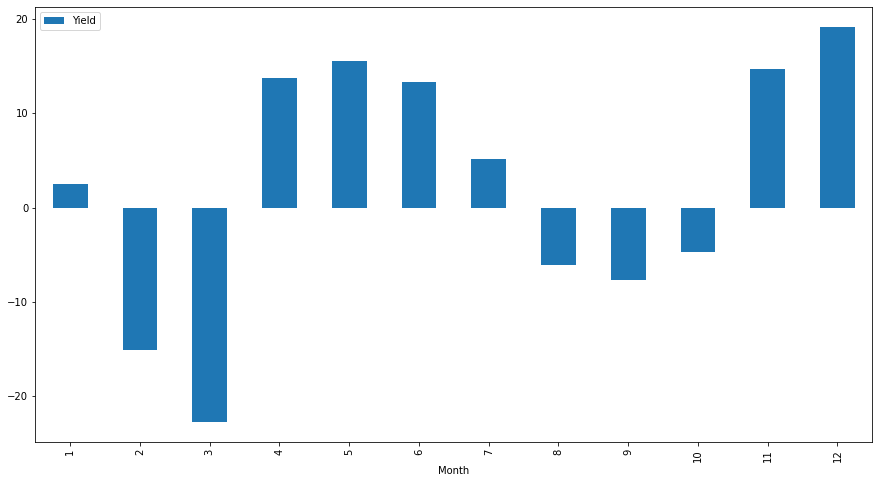

In [21]:
df.groupby('Month').agg({'Yield' : 'sum'}).plot(kind='bar', figsize=(15,8))

In [22]:
df.set_index('Date', inplace=True)

In [23]:
mov_avg30d = df['Close'].rolling(30).mean()
mov_avg90d = df['Close'].rolling(90).mean()

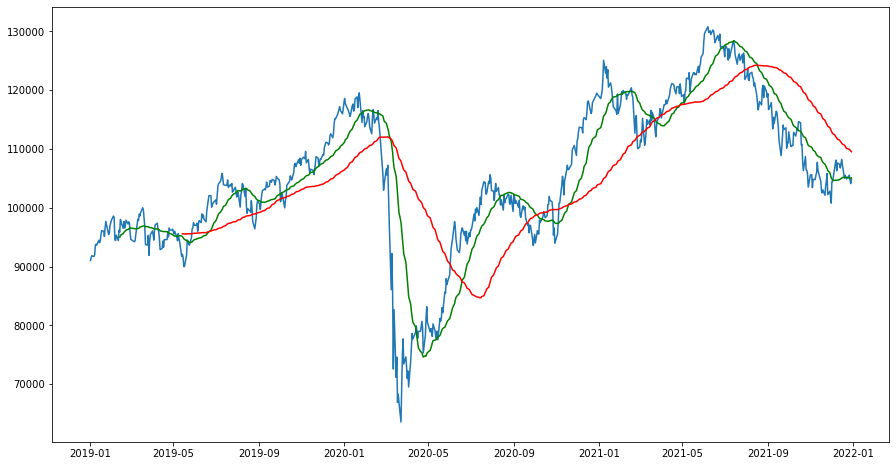

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(df['Close'])
plt.plot(mov_avg30d, 'green')
plt.plot(mov_avg90d, 'red')

##### Answer: For the three years that follow this analysis, the best month for investment or money allocation is in March, followed by February. We can see a strong corelation with the fall in February and March of 2020, because of the WHO declares Covid-19 as pandemic making the all the markets to crash worldwide.

### 2) Which day is the best for investment allocation in IBOV?

<AxesSubplot:xlabel='Day'>

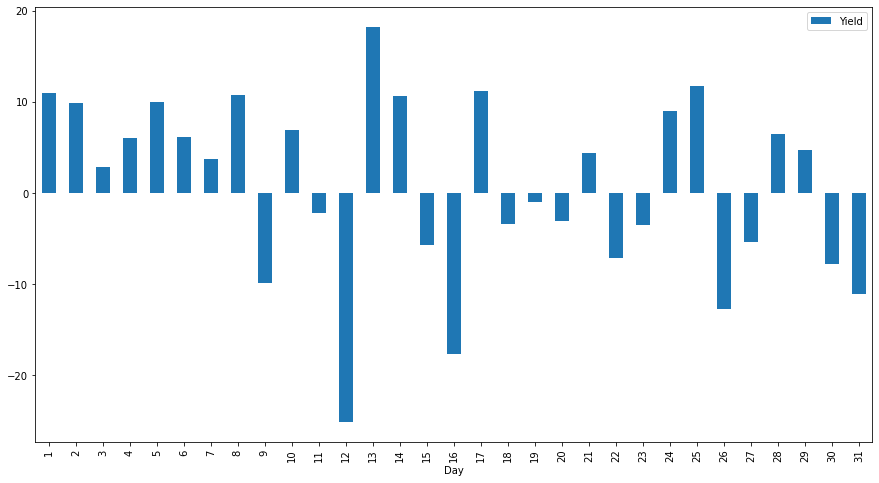

In [25]:
df.groupby('Day').agg({'Yield' : 'sum'}).plot(kind='bar', figsize=(15,8))

##### Answer: The best day for investment in IBOV was day 12 followed by day 16.

In [26]:
df.iloc[0]

Open        87887.0
High        91479.0
Low         87536.0
Close       91012.0
Volume    5615400.0
Year         2019.0
Month           1.0
Day             2.0
Yield           NaN
Name: 2019-01-02 00:00:00, dtype: float64

In [27]:
df.iloc[-1]

Open      1.041060e+05
High      1.052690e+05
Low       1.041060e+05
Close     1.048220e+05
Volume    1.113810e+07
Year      2.021000e+03
Month     1.200000e+01
Day       3.000000e+01
Yield     6.867934e-01
Name: 2021-12-30 00:00:00, dtype: float64

In [28]:
df['Close'].iloc[-1] / df['Close'].iloc[0] * 100 - 100

15.173823232101256